In [1]:
import tensorflow as tf

print(tf.__version__)

2.13.0


In [2]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2023-09-25 18:55:07--  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip [following]
--2023-09-25 18:55:07--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   258MB/s    in 0.3s    

2023-09-25 18:55

In [3]:
# Melakukan ekstraksi pada file zip
import zipfile, os

local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [5]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # Direktori data latih
        target_size=(150, 150),  # Mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # Karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # Direktori data validasi
        target_size=(150, 150), # Mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # Karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [9]:
# Compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
# Latih model dengan model.fit
model.fit(
      train_generator,
      steps_per_epoch=25,  # Berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # Tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # Menampilkan akurasi pengujian data validasi
      validation_steps=5,  # Berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 23s - loss: 0.7204 - accuracy: 0.5500 - val_loss: 0.6798 - val_accuracy: 0.5000 - 23s/epoch - 929ms/step
Epoch 2/20
25/25 - 14s - loss: 0.6966 - accuracy: 0.4300 - val_loss: 0.6929 - val_accuracy: 0.5000 - 14s/epoch - 543ms/step
Epoch 3/20
25/25 - 14s - loss: 0.6957 - accuracy: 0.5200 - val_loss: 0.6929 - val_accuracy: 0.5000 - 14s/epoch - 545ms/step
Epoch 4/20
25/25 - 14s - loss: 0.6928 - accuracy: 0.5300 - val_loss: 0.6932 - val_accuracy: 0.5000 - 14s/epoch - 578ms/step
Epoch 5/20
25/25 - 14s - loss: 0.6928 - accuracy: 0.5300 - val_loss: 0.6932 - val_accuracy: 0.5000 - 14s/epoch - 556ms/step
Epoch 6/20
25/25 - 14s - loss: 0.6946 - accuracy: 0.4400 - val_loss: 0.6932 - val_accuracy: 0.5000 - 14s/epoch - 548ms/step
Epoch 7/20
25/25 - 15s - loss: 0.6932 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.5000 - 15s/epoch - 598ms/step
Epoch 8/20
25/25 - 14s - loss: 0.6929 - accuracy: 0.5300 - val_loss: 0.6932 - val_accuracy: 0.5000 - 14s/epoch - 550ms/step
Epoch 9/

Saving room.jpg to room.jpg
1/1 [==============================] - 0s 146ms/step
room.jpg
messy


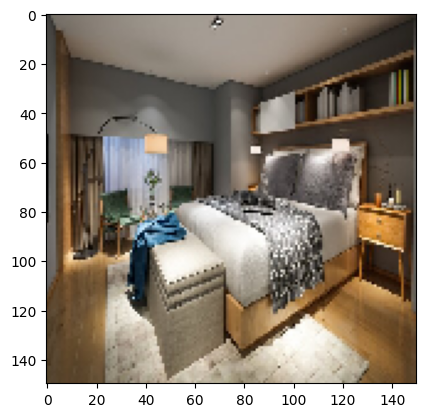

In [11]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
   print('clean')
  else:
   print('messy')